In [8]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [9]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [10]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [11]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
market_data_scaled = scaler.fit_transform(market_data_df)

In [12]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(market_data_scaled, columns=market_data_df.columns)

# Copy the crypto names from the original data
market_data_scaled_df["coin_id"] = market_data_df.index

# Set the coinid column as index
market_data_scaled_df.set_index("coin_id", inplace=True)

# Display sample data
market_data_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [13]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(market_data_scaled_df)
    inertia_values.append(kmeans.inertia_)
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head(11)

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


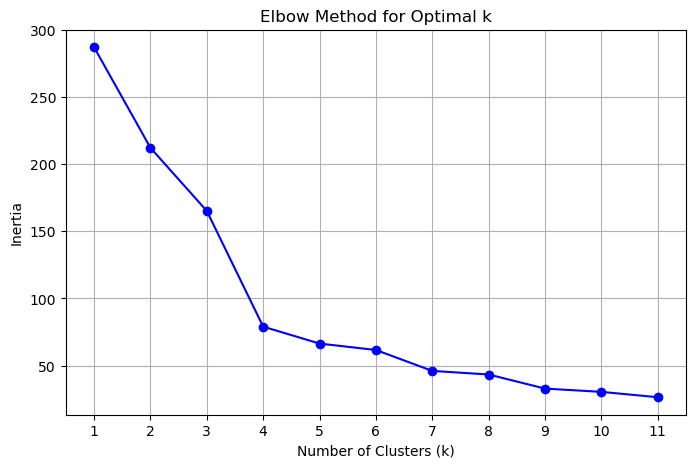

In [14]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.xticks(elbow_df["k"])
plt.grid()
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** id say 4 maybe 5 , I observed that thouse 2 points is where inerta slowed and clusters are still relativily low 

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [20]:
# Initialize the K-Means model using the best value for k
k = 4 
kmeans = KMeans(n_clusters=k, random_state=42)

In [21]:
# Fit the K-Means model using the scaled data
kmeans.fit(market_data_scaled_df)

KMeans(n_clusters=4, random_state=42)

In [22]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_predictions = kmeans.predict(market_data_scaled_df)

# View the resulting array of cluster values.
print(cluster_predictions)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [23]:
# Create a copy of the DataFrame
market_data_clustered_df = market_data_scaled_df.copy()

In [26]:
# Add a new column to the DataFrame with the predicted clusters
market_data_clustered_df['cluster'] = cluster_predictions

# Display sample data
market_data_clustered_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


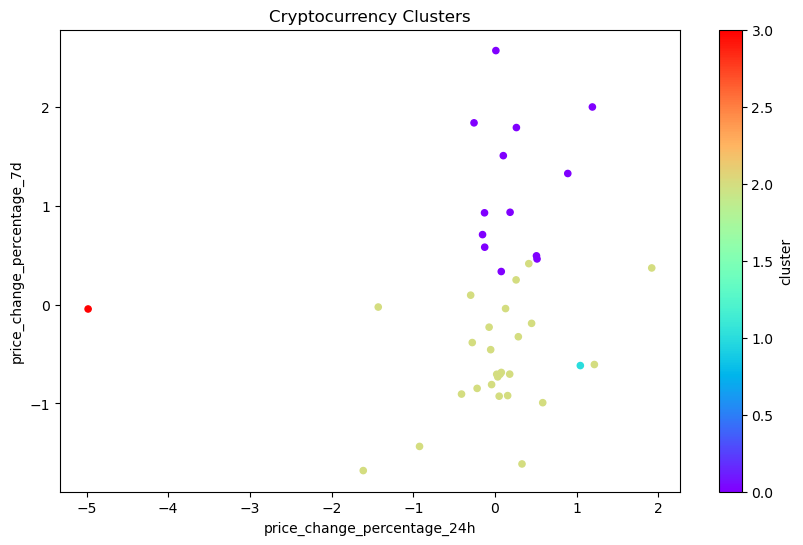

In [27]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_clustered_df.plot(kind='scatter', 
                              x='price_change_percentage_24h', 
                              y='price_change_percentage_7d', 
                              c='cluster', 
                              cmap='rainbow', 
                              figsize=(10, 6),
                              title="Cryptocurrency Clusters")

plt.show()

### Optimize Clusters with Principal Component Analysis.

In [35]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [36]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(market_data_scaled_df)

# View the first five rows of the DataFrame. 

print(pca_data[:5])

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]]


In [37]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained Variance per Component:", explained_variance)

Explained Variance per Component: [0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** the PCA represented about ~90% of the total varience in the data

In [38]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'])

# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data
pca_df['coin_id'] = market_data_df.index

# Set the coinid column as index
pca_df.set_index('coin_id', inplace=True)

# Display sample data
pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [41]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values_pca = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values_pca:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
# 2. Fit the model to the data using PCA DataFrame.
    kmeans.fit(pca_df)
# 3. Append the model.inertia_ to the inertia list
    inertia_values_pca.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values_pca, 'inertia': inertia_values_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901
5,6,31.749005
6,7,28.031869
7,8,19.451747
8,9,13.814082
9,10,10.630648


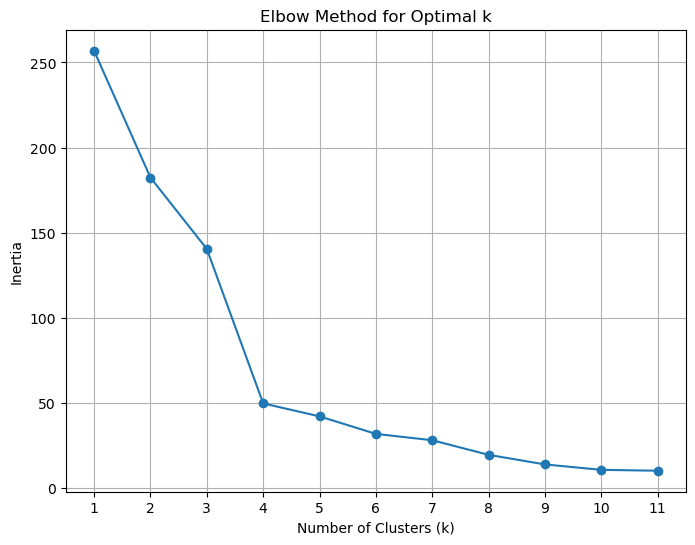

In [42]:
# Plot a line chart with all the inertia values computed with 
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()# the different values of k to visually identify the optimal value for k.


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 or 5


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no it does not differ, they are the same just about, only inertia droped faster this time and at cluster 4 inertia was at 50, where before it was about 75

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [43]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)

In [44]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)

KMeans(n_clusters=4, random_state=42)

In [45]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = kmeans.predict(pca_df)
# Print the resulting array of cluster values.
print(clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [47]:
# Create a copy of the DataFrame with the PCA data
pca_clustered_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_clustered_df['Cluster'] = clusters

# Display sample data
pca_clustered_df.head()

,PCA1,PCA2,PCA3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


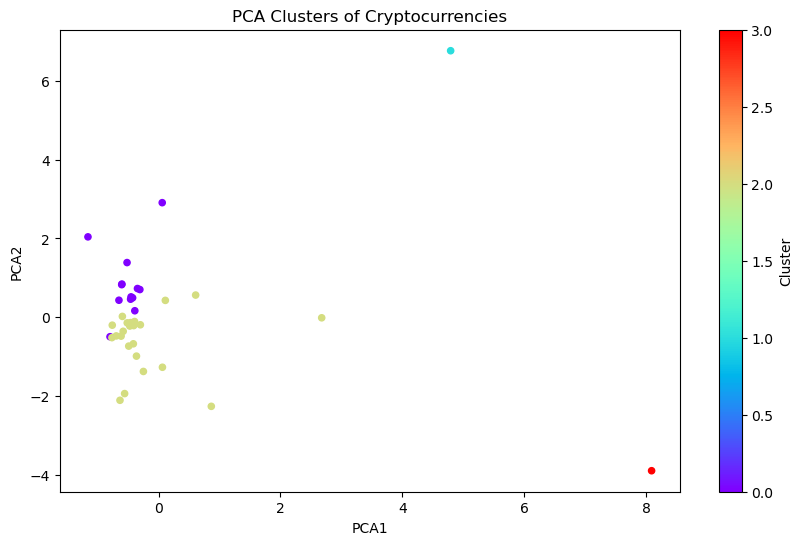

In [48]:
# Create a scatter plot by setting `x="PCA1"` and `y="PCA2"`. 
pca_clustered_df.plot(kind='scatter', x='PCA1', y='PCA2', c='Cluster', cmap='rainbow', figsize=(10, 6), title='PCA Clusters of Cryptocurrencies')
plt.show()

### Determine the Weights of Each Feature on each Principal Component

In [50]:
# Use the columns from the original scaled DataFrame as the index.
pca_weights = pca.components_
pca_weights_df = pd.DataFrame(pca_weights, columns=market_data_scaled_df.columns, index=['PCA1', 'PCA2', 'PCA3'])
pca_weights_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
PCA1,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
PCA2,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
PCA3,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** (PCA1: most positive was 200 day ~0.59, Most negative was 24H ~ -0.41)
              (PCA2:most positive was 30 day ~0.56, most negative was 1 year ~ -0.15)
              (PCA3:most positive was 7 day ~0.78, most negative was 60 day ~ -0.36) 
    